<a href="https://colab.research.google.com/github/vamc526/Deeplearning_Handwritten_Digitrecognition/blob/main/HandWritten_DigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Baseline Neural Network


In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

Initializing parameters

In [2]:
def initialize_parameters(nx, nh1, nh2, ny):
    tf.random.set_seed(1)

    W1 = tf.Variable(tf.random.uniform(shape=(nh1, nx), minval=-0.01, maxval=0.01), name="W1")
    b1 = tf.Variable(tf.zeros(shape=(nh1, 1), name="b1"))
    W2 = tf.Variable(tf.random.uniform(shape=(nh2, nh1), minval=-0.01, maxval=0.01), name="W2")
    b2 = tf.Variable(tf.zeros(shape=(nh2, 1), name="b2"))
    W3 = tf.Variable(tf.random.uniform(shape=(ny, nh2), minval=-0.01, maxval=0.01), name="W3")
    b3 = tf.Variable(tf.zeros(shape=(ny, 1), name="b3"))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}



    return parameters


In [3]:
def forward_pass(parameters, X):
    X = tf.cast(X, tf.float32)
    Z1 = tf.matmul(parameters["W1"], X) + parameters["b1"]
    A1 = tf.nn.relu(Z1)
    Z2 = tf.matmul(parameters["W2"], A1) + parameters["b2"]
    A2 = tf.nn.relu(Z2)
    Z3 = tf.matmul(parameters["W3"], A2) + parameters["b3"]
    Yhat = tf.nn.softmax(Z3, axis=0)

    return Yhat

In [5]:
def compute_loss(Y, Yhat):

    per_sample_loss= -tf.math.reduce_sum(Y * tf.math.log(Yhat + 1e-10), axis=0)

    loss= tf.reduce_mean(per_sample_loss)

    return loss

In [6]:
def backward_pass(parameters, loss, tape):
    gradients = tape.gradient(loss, parameters)
    return gradients

In [7]:
def update_parameters(parameters, gradients, learning_rate):
    parameters["W1"].assign_sub(learning_rate * gradients["W1"])
    parameters["W2"].assign_sub(learning_rate * gradients["W2"])
    parameters["b1"].assign_sub(learning_rate * gradients["b1"])
    parameters["b2"].assign_sub(learning_rate * gradients["b2"])
    parameters["W3"].assign_sub(learning_rate * gradients["W3"])
    parameters["b3"].assign_sub(learning_rate * gradients["b3"])
    return parameters

In [8]:
def create_nn_model(train_X,train_Y,nh1,nh2, val_X, val_Y, num_iterations, learning_rate):
    """
    Do some safety check on the data before proceeding.
    train_X and val_X must have the same number of features (i.e., same number of rows)
    train_X must have the same number of examples as train_Y (i.e., same number of columns )
    val_X must have the same number of examples as Val_Y
    """
    assert(train_X.shape[0]==val_X.shape[0]), "train_X and val_X must have the same number of features"
    assert(train_X.shape[1]==train_Y.shape[1]), "train_X and train_Y must have the same number of examples"
    assert(val_X.shape[1]==val_Y.shape[1]), "val_X and val_Y must have the same number of examples"


    #getting the number of features
    nx=train_X.shape[0]

    # We want to use this network for multi classification, so we have only 10 neurons in the output layer with a softmax activation
    ny=10

    # initializing the parameteres
    parameters=initialize_parameters(nx,nh1,nh2,ny)


    #initialize lists to store the training and valideation losses.
    val_losses=[]
    train_losses=[]

    #run num_iterations of gradient descent
    for i in range (0, num_iterations):

      """
        run forward pass and compute the loss function on training and validation data.
        Note that the forward pass and loss computations on the training data are enclosed inside the gradient tape context in order to build the computational graph.
        The gradients are only computed on the training data and used to update the parameter. Validation data is not used for training and updating the parameters.
        """

      with tf.GradientTape() as tape:
        #run the forward pass on train_X
        train_Yhat=forward_pass(parameters,train_X)
        #compute the train_loss
        train_loss=compute_loss(train_Y,train_Yhat)


       #compute validation loss
      Yhat_val= forward_pass(parameters,val_X)
      val_loss=compute_loss(val_Y,Yhat_val)

      #print the trianing loss and validation loss for each iteration.
      print("iteration {} :train_loss:{} val_loss{}".format(i,train_loss,val_loss))

       # append the train and validation loss for the current iteration to the train_losses and val_losses
      train_losses.append(train_loss)
      val_losses.append(val_loss)

      """
      Compute the gradients and update the parameters
      """
      #compute the gradients on the training data
      gradients=backward_pass(parameters,train_loss,tape)

      # update the parameters
      parameters=update_parameters(parameters, gradients, learning_rate)



    #create a dictionary history and put train_loss and validaiton_loss in it
    history={"val_loss": val_losses,
             "train_loss": train_losses}


    #return the parameters and the history
    return parameters, history


In [9]:
import pandas as pd


data = pd.read_csv("/content/drive/MyDrive/German_digits.csv")




In [10]:
data.info()
X = data.iloc[:, :-1].values / 255.0
Y = pd.get_dummies(data.iloc[:, -1]).values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4426 entries, 0 to 4425
Columns: 1601 entries, 1 to 1601
dtypes: int64(1601)
memory usage: 54.1 MB


In [11]:
print(X.shape)

(4426, 1600)


In [12]:
print(Y.shape)

(4426, 10)


In [13]:
import numpy as np
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(3540, 1600)
(3540, 10)
(886, 1600)
(886, 10)


In [15]:
train_x=train_x.T
test_x=test_x.T
train_y= train_y.T
test_y=test_y.T

In [16]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1600, 3540)
(10, 3540)
(1600, 886)
(10, 886)


In [17]:
iterations=1000
parameters, history=create_nn_model(train_x,train_y,30,50,test_x,test_y, iterations, 0.001)

iteration 0 :train_loss:2.3025856018066406 val_loss2.302582263946533
iteration 1 :train_loss:2.3025856018066406 val_loss2.302582025527954
iteration 2 :train_loss:2.3025856018066406 val_loss2.302582025527954
iteration 3 :train_loss:2.3025853633880615 val_loss2.302582025527954
iteration 4 :train_loss:2.3025853633880615 val_loss2.302582025527954
iteration 5 :train_loss:2.3025853633880615 val_loss2.302582025527954
iteration 6 :train_loss:2.3025851249694824 val_loss2.302582025527954
iteration 7 :train_loss:2.3025848865509033 val_loss2.302582025527954
iteration 8 :train_loss:2.3025848865509033 val_loss2.302582025527954
iteration 9 :train_loss:2.3025848865509033 val_loss2.302581787109375
iteration 10 :train_loss:2.3025848865509033 val_loss2.302581787109375
iteration 11 :train_loss:2.302584648132324 val_loss2.302582025527954
iteration 12 :train_loss:2.302584648132324 val_loss2.302581787109375
iteration 13 :train_loss:2.302584648132324 val_loss2.302581787109375
iteration 14 :train_loss:2.302584

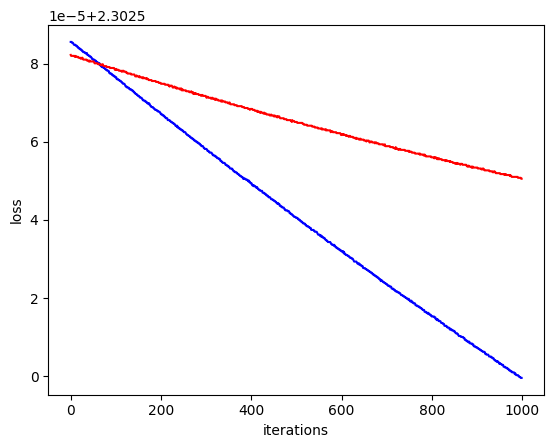

In [18]:
plt.plot(range(0,iterations),history["train_loss"],'b')
plt.plot(range(0,iterations),history["val_loss"],'r')
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()

Hyper-parameter tuning

In [19]:
neuron_numbers1 = [30, 50, 80]
neuron_numbers2 = [30, 50, 80]
learning_rates = [0.001, 0.01, 0.1]  # Example: testing 3 different learning rates

# Initialize variables to store the best hyperparameters
best_val_loss = float('inf')
best_nh1 = None
best_nh2 = None
best_learning_rate = None


for neurons1 in neuron_numbers1:
  for neurons2 in neuron_numbers2:
    for lr in learning_rates:
        parameters, history = create_nn_model(train_x, train_y, neurons1,neurons2, test_x, test_y, iterations, lr)
        current_val_loss = list(history.values())[-1][-1]
        if current_val_loss < best_val_loss:
            best_val_loss = current_val_loss
            best_nh1 = neurons1
            best_nh2 = neurons2
            best_learning_rate = lr
            best_history = history  # To plot the learning curve of the best model later if needed


print(f"Best number of neurons in first hidden layer : {best_nh1}")
print(f"Best number of neurons in second hidden layer: {best_nh2}")
print(f"Best learning rate: {best_learning_rate}")
print(f"Best validation loss: {best_val_loss}")

Streaming output truncated to the last 5000 lines.
iteration 4 :train_loss:2.3025825023651123 val_loss2.3025834560394287
iteration 5 :train_loss:2.302581787109375 val_loss2.3025829792022705
iteration 6 :train_loss:2.3025808334350586 val_loss2.3025827407836914
iteration 7 :train_loss:2.302579641342163 val_loss2.302582263946533
iteration 8 :train_loss:2.3025786876678467 val_loss2.302581787109375
iteration 9 :train_loss:2.3025777339935303 val_loss2.302581548690796
iteration 10 :train_loss:2.302576780319214 val_loss2.3025810718536377
iteration 11 :train_loss:2.3025758266448975 val_loss2.3025805950164795
iteration 12 :train_loss:2.302574872970581 val_loss2.3025803565979004
iteration 13 :train_loss:2.3025741577148438 val_loss2.302579879760742
iteration 14 :train_loss:2.3025732040405273 val_loss2.302579402923584
iteration 15 :train_loss:2.302572011947632 val_loss2.302579164505005
iteration 16 :train_loss:2.3025708198547363 val_loss2.302578926086426
iteration 17 :train_loss:2.302570104598999 v

##Model Evaluation

In [20]:
def predict(parameters,X):
    Yhat=forward_pass(parameters, X)
    predicted_label = np.argmax(Yhat, axis=0)
    return predicted_label

In [21]:
def accuracy(observedY,predictedY):
    #return the ratio of the examples for which predictedY=observedY over the total number of examples
    return float(np.sum(predictedY==observedY))/observedY.size

In [22]:
predicted_labels = predict(parameters, test_x)
actual_labels = test_y.argmax(axis=0)

In [23]:
print("accurracy of the model on the validation data is:", accuracy(actual_labels,predicted_labels))

accurracy of the model on the validation data is: 0.8656884875846501


Few images of the Correct predictions by the model

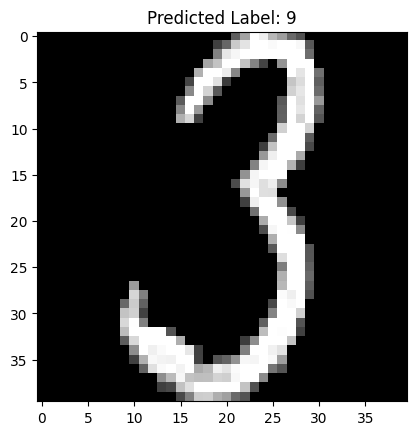

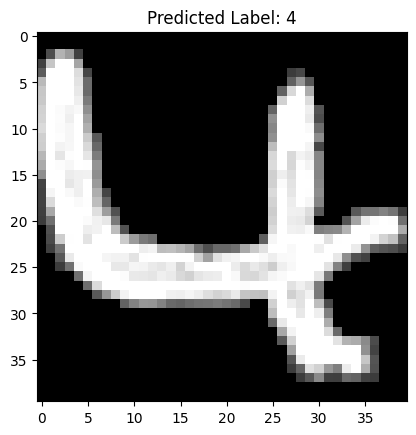

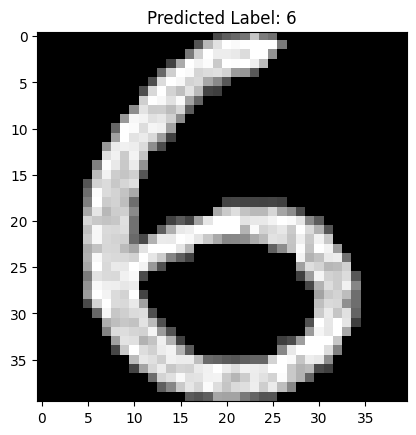

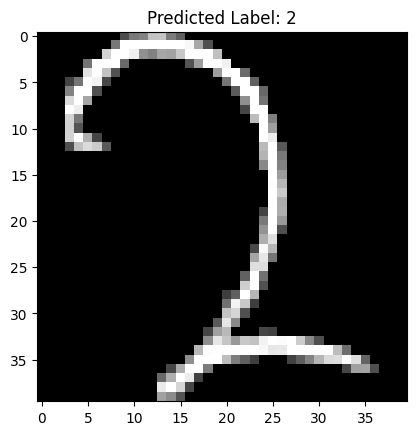

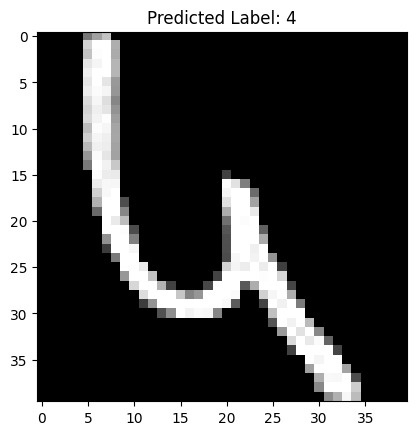

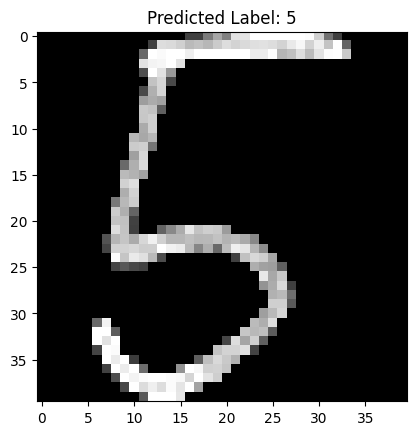

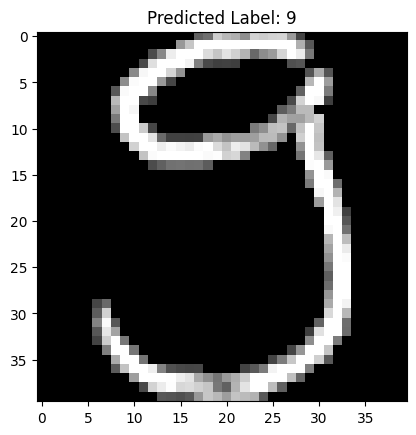

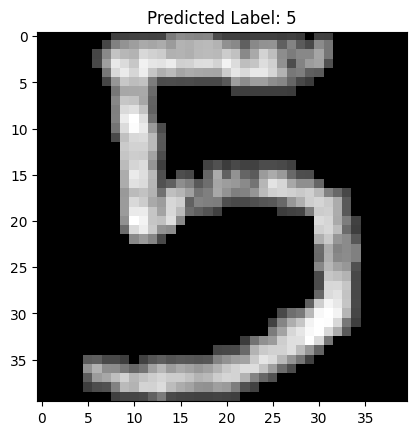

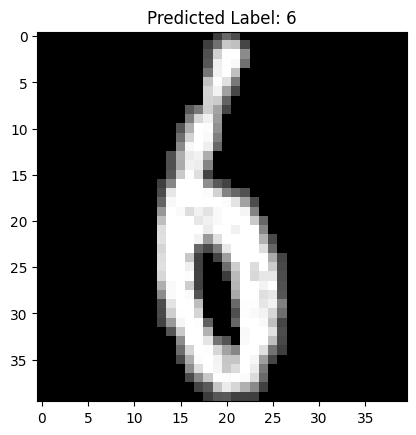

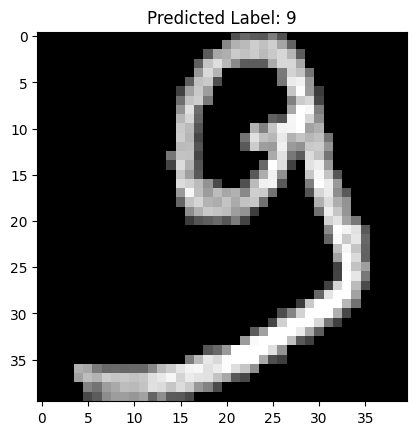

In [24]:
import matplotlib.pyplot as plt

for i in range(10):

    image = test_x[:, i].reshape(40, 40)
    plt.imshow(image, cmap='gray')
    plt.title("Predicted Label: {}".format(predicted_labels[i]))
    plt.show()

##Improving model with Nestrovmomentum, Minibatching and Dropout

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import zipfile


In [73]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

In [74]:
import numpy as np
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)
train_x, val_x, train_y, val_y = train_test_split(train_x,train_y, test_size= 0.15, random_state=42)

In [75]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(val_x.shape)
print(val_y.shape)

(3009, 1600)
(3009,)
(886, 1600)
(886,)
(531, 1600)
(531,)


In [76]:
train = tf.data.Dataset.from_tensor_slices((train_x, train_y))
test = tf.data.Dataset.from_tensor_slices((test_x, test_y))
validation = tf.data.Dataset.from_tensor_slices((val_x, val_y))

In [77]:
train = train.shuffle(50).batch(32)
test = test.batch(32)
validation= validation.batch(32)

In [78]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [79]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [80]:
model.fit(train, epochs=20)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


95/95 [==============================] - 2s 8ms/step - loss: 22.2287 - accuracy: 0.5796
Epoch 2/20
95/95 [==============================] - 0s 4ms/step - loss: 4.9142 - accuracy: 0.7856
Epoch 3/20
95/95 [==============================] - 0s 4ms/step - loss: 3.4375 - accuracy: 0.8229
Epoch 4/20
95/95 [==============================] - 0s 4ms/step - loss: 2.3515 - accuracy: 0.8681
Epoch 5/20
95/95 [==============================] - 0s 4ms/step - loss: 1.8805 - accuracy: 0.8973
Epoch 6/20
95/95 [==============================] - 0s 4ms/step - loss: 1.5876 - accuracy: 0.9119
Epoch 7/20
95/95 [==============================] - 0s 4ms/step - loss: 1.2435 - accuracy: 0.9299
Epoch 8/20
95/95 [==============================] - 0s 4ms/step - loss: 1.3827 - accuracy: 0.9329
Epoch 9/20
95/95 [==============================] - 0s 4ms/step - loss: 0.8856 - accuracy: 0.9462
Epoch 10/20
95/95 [==============================] - 0s 4ms/step - loss: 1.0330 - accuracy: 0.9508
Epoch 11/20
95/95 [==========

In [81]:

def model(input_shape):
       model=keras.Sequential(
    [
        layers.experimental.preprocessing.Rescaling(1./255, input_shape = (None, 1600)),
        layers.Dense(64, activation='relu' ),
        layers.Dense(32, activation='relu'),
        layers.Dense(10, activation="softmax")
    ])
       return model

In [82]:
input_shape = (None, 1600)

initial_model=model(input_shape)

print(initial_model.summary())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, None, 1600)        0         
                                                                 
 dense_12 (Dense)            (None, None, 64)          102464    
                                                                 
 dense_13 (Dense)            (None, None, 32)          2080      
                                                                 
 dense_14 (Dense)            (None, None, 10)          330       
                                                                 
Total params: 104874 (409.66 KB)
Trainable params: 104874 (409.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [83]:
initial_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'], optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))

In [84]:
history = initial_model.fit(train,validation_data=validation,epochs=50)

Epoch 1/50
95/95 [==============================] - 1s 5ms/step - loss: 2.3360 - accuracy: 0.1120 - val_loss: 2.3145 - val_accuracy: 0.1149
Epoch 2/50
95/95 [==============================] - 0s 3ms/step - loss: 2.2902 - accuracy: 0.1452 - val_loss: 2.2807 - val_accuracy: 0.1394
Epoch 3/50
95/95 [==============================] - 0s 3ms/step - loss: 2.2540 - accuracy: 0.1745 - val_loss: 2.2505 - val_accuracy: 0.1714
Epoch 4/50
95/95 [==============================] - 0s 3ms/step - loss: 2.2197 - accuracy: 0.2207 - val_loss: 2.2198 - val_accuracy: 0.1940
Epoch 5/50
95/95 [==============================] - 0s 3ms/step - loss: 2.1841 - accuracy: 0.2539 - val_loss: 2.1880 - val_accuracy: 0.2260
Epoch 6/50
95/95 [==============================] - 0s 3ms/step - loss: 2.1479 - accuracy: 0.2908 - val_loss: 2.1545 - val_accuracy: 0.2731
Epoch 7/50
95/95 [==============================] - 1s 6ms/step - loss: 2.1100 - accuracy: 0.3290 - val_loss: 2.1183 - val_accuracy: 0.3126
Epoch 8/50
95/95 [==

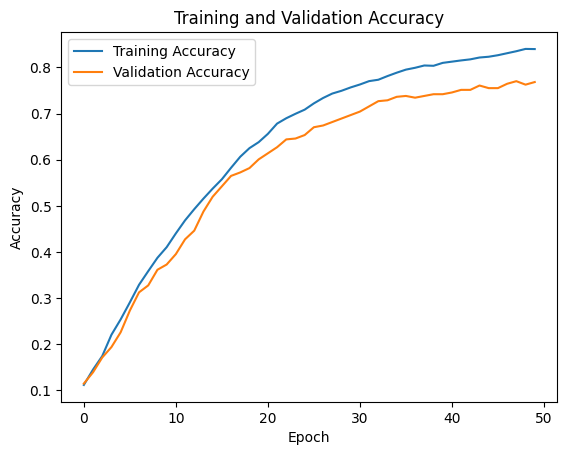

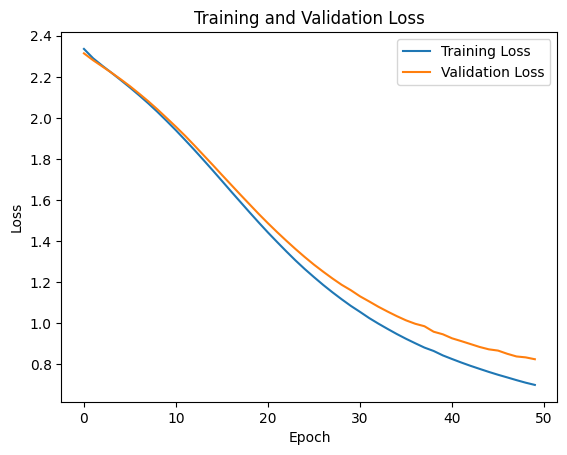

In [85]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [86]:
tf.random.set_seed(1)

In [87]:
lr_sch = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    alpha=1e-2,
    decay_steps=10000)


initial_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'], optimizer= tf.keras.optimizers.SGD(learning_rate=lr_sch, momentum=0.98, nesterov=True))


In [88]:
tensorboard = keras.callbacks.TensorBoard(
log_dir="/content/drive/MyDrive/tensorboard_logs/model_sgd",
histogram_freq=1
)

!rm -rf "/content/drive/MyDrive/tensorboard_logs/model_sgd"


In [89]:
history2 = initial_model.fit(
            train,
            validation_data = validation,
            epochs = 50,
            verbose = 1,
            callbacks=[tensorboard])

Epoch 1/50
95/95 [==============================] - 2s 10ms/step - loss: 0.6374 - accuracy: 0.8471 - val_loss: 0.6762 - val_accuracy: 0.8079
Epoch 2/50
95/95 [==============================] - 1s 8ms/step - loss: 0.4451 - accuracy: 0.8794 - val_loss: 0.5574 - val_accuracy: 0.8456
Epoch 3/50
95/95 [==============================] - 1s 9ms/step - loss: 0.3486 - accuracy: 0.9050 - val_loss: 0.5274 - val_accuracy: 0.8418
Epoch 4/50
95/95 [==============================] - 0s 5ms/step - loss: 0.2708 - accuracy: 0.9322 - val_loss: 0.5138 - val_accuracy: 0.8493
Epoch 5/50
95/95 [==============================] - 0s 5ms/step - loss: 0.2338 - accuracy: 0.9408 - val_loss: 0.5133 - val_accuracy: 0.8493
Epoch 6/50
95/95 [==============================] - 0s 5ms/step - loss: 0.1906 - accuracy: 0.9551 - val_loss: 0.5063 - val_accuracy: 0.8625
Epoch 7/50
95/95 [==============================] - 0s 5ms/step - loss: 0.1537 - accuracy: 0.9651 - val_loss: 0.4953 - val_accuracy: 0.8569
Epoch 8/50
95/95 [=

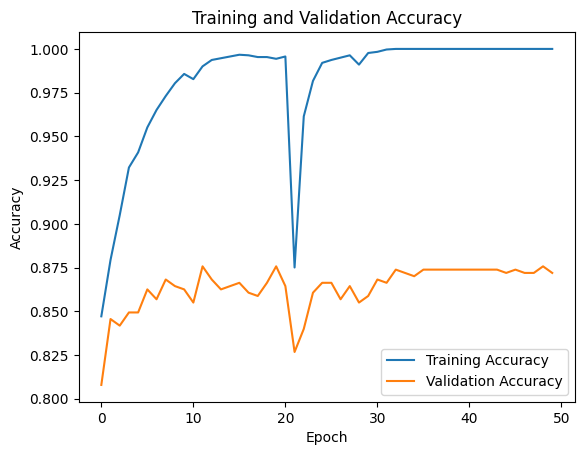

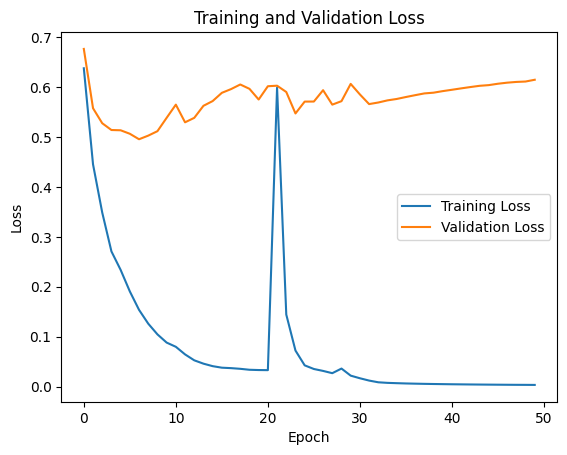

In [90]:
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [93]:
def regularized_model2(input_shape):

        input = keras.Input(shape=input_shape)
        x = layers.experimental.preprocessing.Rescaling(1./255)(input)

        x=layers.Dense(64, kernel_initializer=tf.keras.initializers.he_normal(seed=1), kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
        x= layers.BatchNormalization()(x)
        x= layers.ReLU()(x)
        x=layers.Dropout(0.2)(x)

        x=layers.Dense(32, kernel_initializer=tf.keras.initializers.he_normal(seed=1), kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
        x= layers.BatchNormalization()(x)
        x= layers.ReLU()(x)
        x=layers.Dropout(0.2)(x)

        x=layers.Dense(16, kernel_initializer=tf.keras.initializers.he_normal(seed=1), kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
        x= layers.BatchNormalization()(x)
        x= layers.ReLU()(x)
        x=layers.Dropout(0.3)(x)


        x=layers.Dense(16, kernel_initializer=tf.keras.initializers.he_normal(seed=1), kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
        x= layers.BatchNormalization()(x)
        x= layers.ReLU()(x)
        x=layers.Dropout(0.3)(x)

        x=layers.Dense(16, kernel_initializer=tf.keras.initializers.he_normal(seed=1), kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
        x= layers.BatchNormalization()(x)
        x= layers.ReLU()(x)
        x=layers.Dropout(0.3)(x)

        output=layers.Dense(10, activation="softmax")(x)

        model = keras.Model(inputs=input, outputs=output)
        return model


In [94]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-3, restore_best_weights=True)

In [95]:
reg_model2=regularized_model2(input_shape=(1600,))
print(reg_model2.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1600)]            0         
                                                                 
 rescaling_3 (Rescaling)     (None, 1600)              0         
                                                                 
 dense_15 (Dense)            (None, 64)                102464    
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                             

In [96]:
reg_model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'], optimizer=tf.keras.optimizers.SGD(learning_rate=lr_sch, momentum=0.98, nesterov=True))

In [97]:
tensorboard = keras.callbacks.TensorBoard(
log_dir="/content/drive/MyDrive/tensorboard_logs/reg_model2",
histogram_freq=1
)
#remove the log directory if already exists
!rm -rf "/content/drive/MyDrive/tensorboard_logs/reg_model2"

history5 = reg_model2.fit(
            train,
            validation_data = validation,
            epochs = 100,
            verbose = 1,
            callbacks=[tensorboard, early_stopping])

Epoch 1/100
95/95 [==============================] - 3s 12ms/step - loss: 2.7076 - accuracy: 0.1176 - val_loss: 2.4382 - val_accuracy: 0.2373
Epoch 2/100
95/95 [==============================] - 1s 9ms/step - loss: 2.5012 - accuracy: 0.1781 - val_loss: 2.2334 - val_accuracy: 0.3465
Epoch 3/100
95/95 [==============================] - 1s 9ms/step - loss: 2.3424 - accuracy: 0.2493 - val_loss: 2.0712 - val_accuracy: 0.4181
Epoch 4/100
95/95 [==============================] - 1s 9ms/step - loss: 2.2470 - accuracy: 0.2891 - val_loss: 1.9309 - val_accuracy: 0.5009
Epoch 5/100
95/95 [==============================] - 1s 8ms/step - loss: 2.1432 - accuracy: 0.3337 - val_loss: 1.7652 - val_accuracy: 0.5631
Epoch 6/100
95/95 [==============================] - 1s 11ms/step - loss: 2.0295 - accuracy: 0.3835 - val_loss: 1.6744 - val_accuracy: 0.5932
Epoch 7/100
95/95 [==============================] - 1s 13ms/step - loss: 1.9683 - accuracy: 0.3872 - val_loss: 1.5782 - val_accuracy: 0.6252
Epoch 8/10

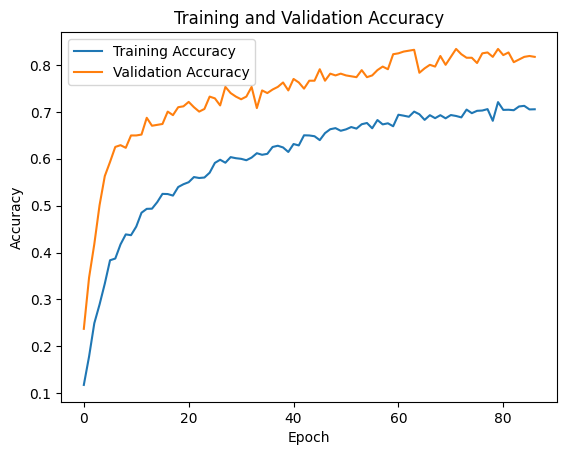

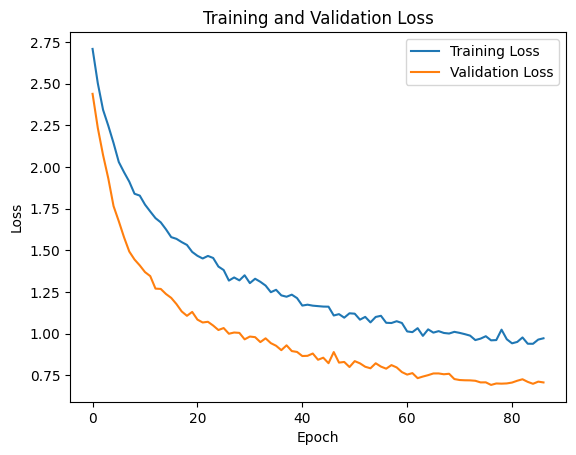

In [98]:
plt.plot(history5.history['accuracy'], label='Training Accuracy')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history5.history['loss'], label='Training Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [99]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.2 MB/s eta 0:00:00


In [100]:
def model_builder(hp):

  #creating a placeholder for each hyperparameter with a range of values for each hyperparameter we want to tune
  hp_units = hp.Int('units', min_value = 16, max_value = 512, step = 32)
  hp_num_layers = hp.Int('num_layers', min_value = 1, max_value = 10, step=1)
  hp_dropout_rate = hp.Float('dropout', min_value = 0,max_value = 0.5, step = 0.1)
  hp_learningrate=hp.Float("initial_learning_rate",min_value=1e-4, max_value=1e-2, sampling='log')
  hp_momentum=hp.Choice("momentum", values=(0.9, 0.99))
  hp_lr_decay_steps=hp.Choice("lr_decay_steps", values=(1000, 5000, 10000))
  hp_weight_decay=hp.Float("weight_decay",min_value=1e-3, max_value=1e-1, sampling='log')



  input = keras.Input(shape=(1600,))
  x = layers.experimental.preprocessing.Rescaling(1./255)(input)

   #hidden layers
  for _ in range(hp_num_layers):
    x=layers.Dense(hp_units, kernel_initializer=tf.keras.initializers.he_normal(seed=1), kernel_regularizer=tf.keras.regularizers.l2(hp_weight_decay))(x)
    x= layers.BatchNormalization()(x)
    x= layers.ReLU()(x)
    x=layers.Dropout(hp_dropout_rate)(x)

 #The final output layer has one neuron with sigmoid activation to output the probability of the target class ( cate or dog whichever is labled as one)
  output=layers.Dense(10, activation="softmax")(x)
 #create a model and set its input and output and return it
  model = keras.Model(inputs=input, outputs=output)

  lr_schedule = keras.optimizers.schedules.CosineDecay(
  initial_learning_rate=hp_learningrate,
  decay_steps=hp_lr_decay_steps, alpha=1e-2)

  #configuring and compiling the model
  opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=hp_momentum, nesterov=True)
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'], optimizer=opt)

  return model

In [101]:
import keras_tuner as kt
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy',
                     max_epochs = 20,
                     factor = 3,
                     directory = 'hyperparameter_runs',
                     project_name = 'Digit_recognition')

In [102]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, min_delta=1e-4, restore_best_weights=True)
tensorboard = keras.callbacks.TensorBoard(
log_dir="/content/drive/MyDrive/tensorboard_logs/hyperparameter",
histogram_freq=1
)
#remove the log directory if already exists
!rm -rf "/content/drive/MyDrive/tensorboard_logs/hyperparameter"
tuner.search(train,
            validation_data = validation,
            epochs = 10,
            callbacks=[early_stopping, tensorboard],
            verbose = 1)

Trial 30 Complete [00h 00m 22s]
val_accuracy: 0.9058380126953125

Best val_accuracy So Far: 0.9058380126953125
Total elapsed time: 00h 11m 01s


In [103]:
best_hps=tuner.get_best_hyperparameters()[0]
best_model=tuner.get_best_models(num_models=1)[0]
print(f"""
The hyperparameter search is complete.
The optimal number of units  is {best_hps.get('units')}.
The optimal number of layers  is {best_hps.get('num_layers')}.
The optimal learning rate for the optimizer is {best_hps.get('initial_learning_rate')}.
The optimal momentum for the optimizer is is {best_hps.get('momentum')}.
The optimal dropout is {best_hps.get('dropout')}.
The optimal decay_steps for cosine schedule is {best_hps.get('lr_decay_steps')}.
The optimal weight decay is {best_hps.get('weight_decay')}.
""")


The hyperparameter search is complete.
The optimal number of units  is 208.
The optimal number of layers  is 3.
The optimal learning rate for the optimizer is 0.0032336344999961413.
The optimal momentum for the optimizer is is 0.9.
The optimal dropout is 0.1.
The optimal decay_steps for cosine schedule is 5000.
The optimal weight decay is 0.004574773045417952.



In [104]:
test_loss, test_acc = best_model.evaluate(test)
print('test acc:', test_acc)

28/28 [==============================] - 0s 4ms/step - loss: 3.8498 - accuracy: 0.9041
test acc: 0.9040632247924805


In [105]:
probability_model = tf.keras.Sequential([best_model,
                                         tf.keras.layers.Softmax()])

In [106]:
prediction = probability_model.predict(test_x)

28/28 [==============================] - 0s 4ms/step


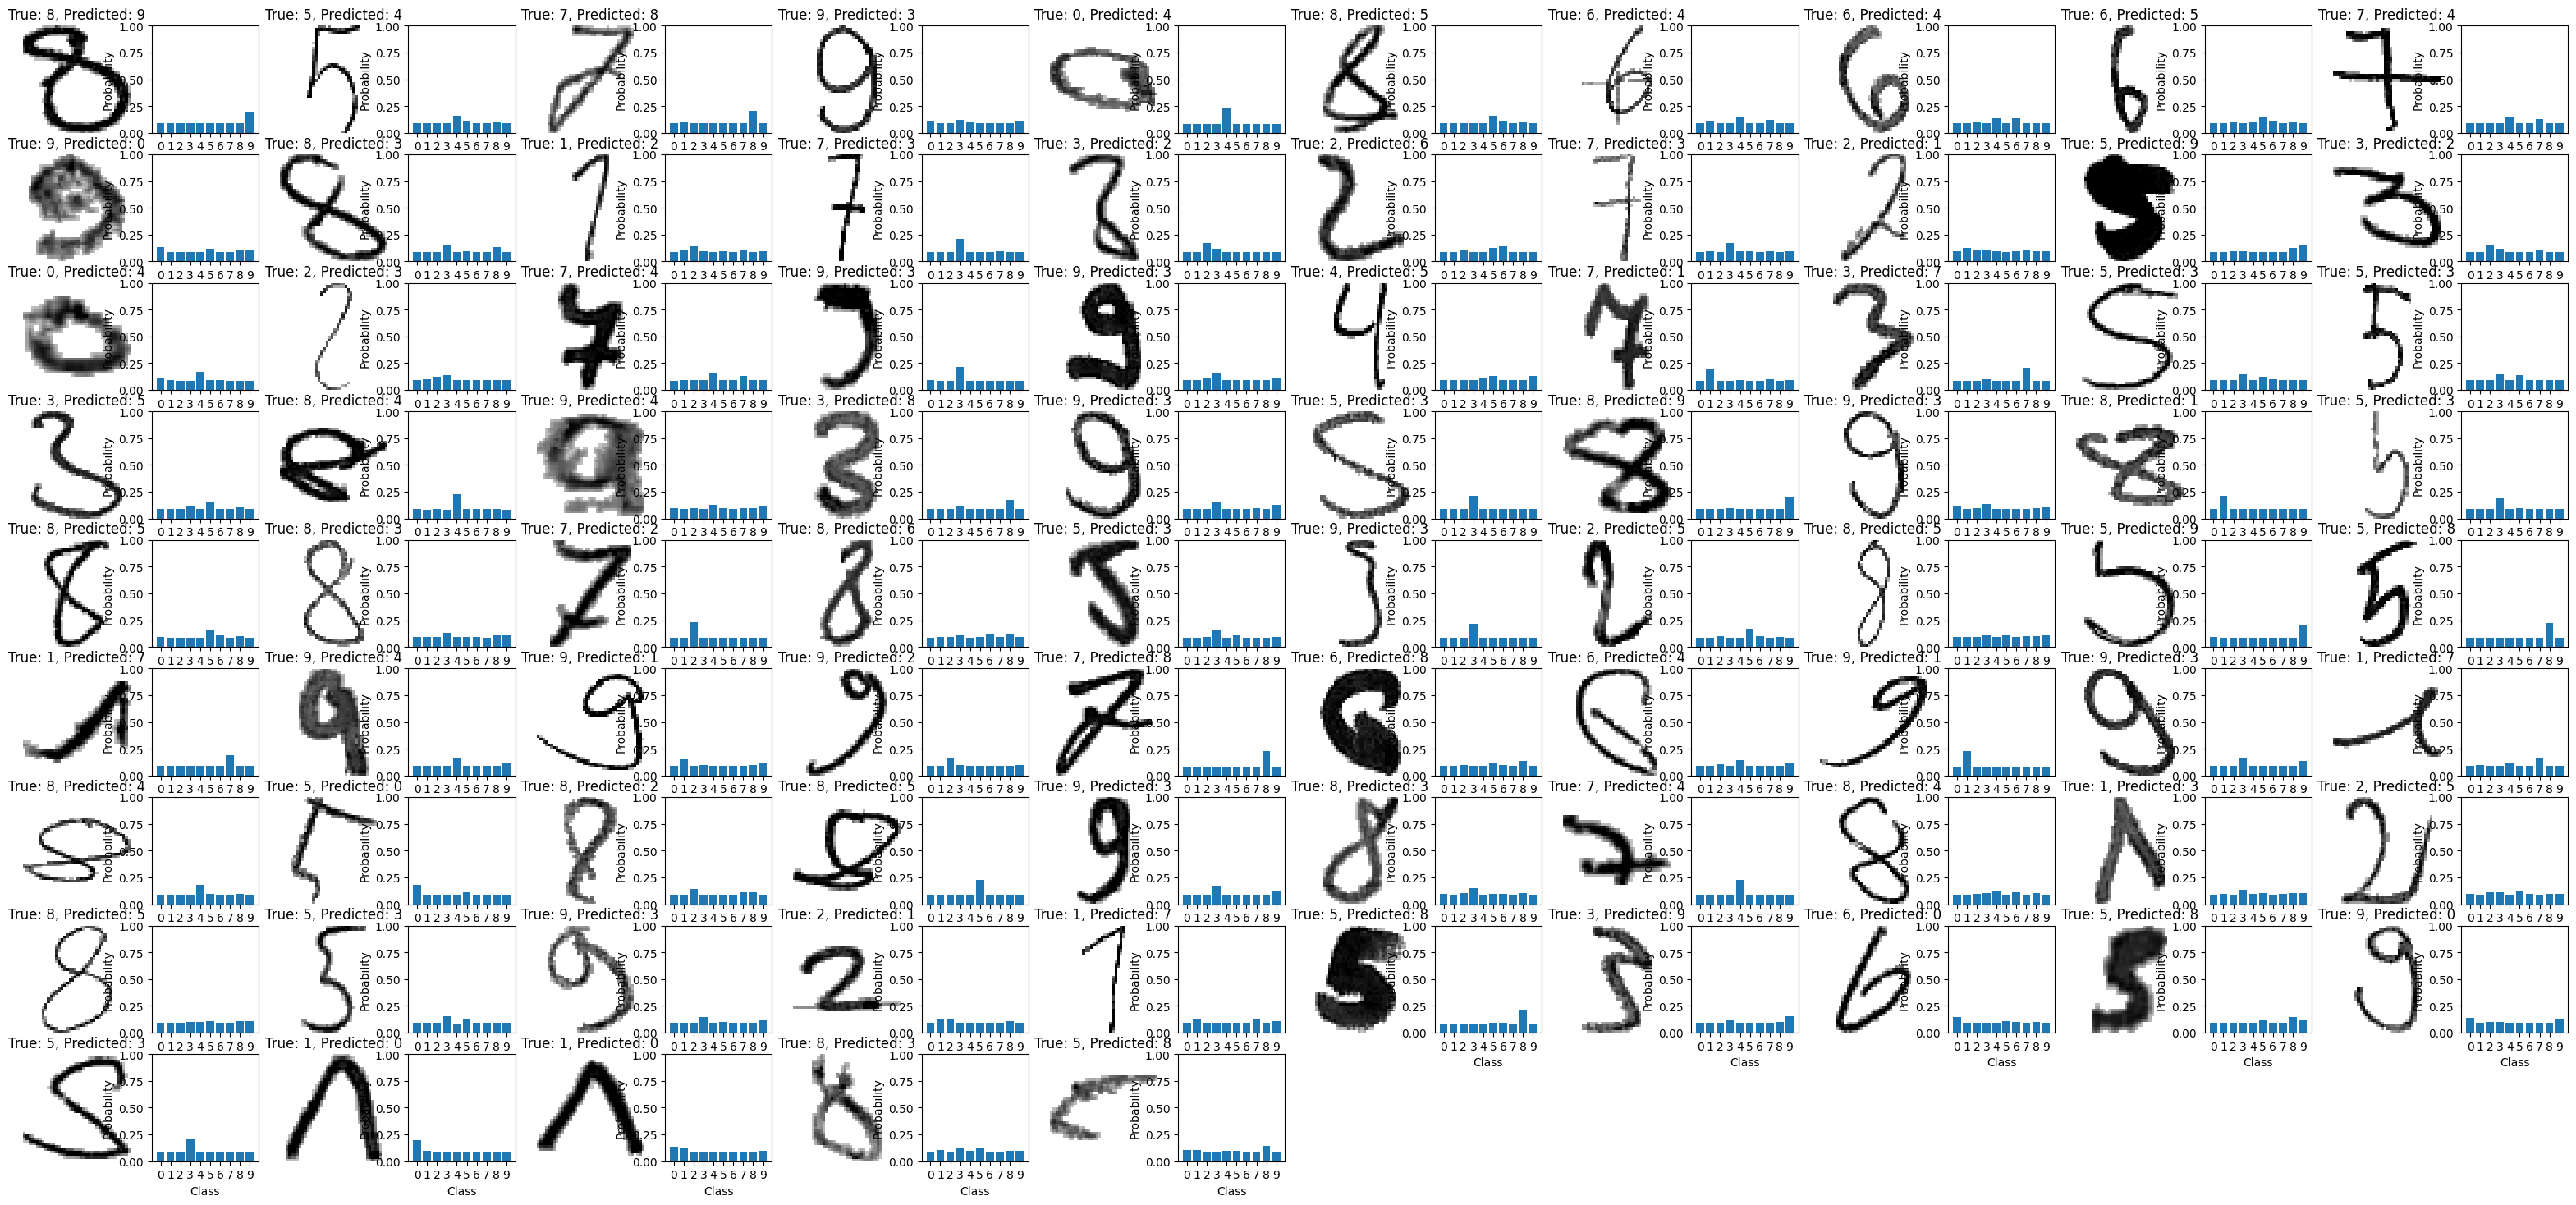

In [107]:
predicted_labels = np.argmax(prediction, axis=1)

misclassified_indices = np.where(predicted_labels != test_y)
misclassified_images = test_x[misclassified_indices].reshape((-1,40, 40))
misclassified_labels = test_y[misclassified_indices]
misclassified_predicted_labels = predicted_labels[misclassified_indices]

plt.figure(figsize=(40, 20))
for i in range(min(100, len(misclassified_images))):
    plt.subplot(10, 20,2 * i + 1)
    plt.imshow(misclassified_images[i], cmap=plt.cm.binary)
    plt.title(f"True: {misclassified_labels[i]}, Predicted: {misclassified_predicted_labels[i]}")
    plt.axis('off')

    plt.subplot(10, 20,2 * i + 2 )
    predicted_probabilities = prediction[misclassified_indices][i]
    plt.bar(range(10), predicted_probabilities)
    plt.xticks(range(10))
    plt.ylim([0, 1])
    plt.xlabel('Class')
    plt.ylabel('Probability')

plt.show()